<a href="https://colab.research.google.com/github/gauravdnair1502/Visualization-of-Data-Distributions/blob/master/Vehicle_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Required Packages**

In [ ]:
import torch

In [ ]:
!pip install detecto


In [ ]:
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**The Dataset**

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download pratikbarua/vehicle-detection-dataset

In [ ]:
!unzip /content/sample_data/vehicle-detection-dataset.zip

**Training**

In [ ]:
Train_dataset=core.Dataset('/content/sample_data/train')#L1
Test_dataset = core.Dataset('/content/sample_data/test1')#L2

In [ ]:
loader=core.DataLoader(Train_dataset, batch_size=50, shuffle=True)#L3

In [ ]:
model = core.Model(['bus', 'rickshaw','motorbike','car','three wheelers (CNG)','pickup','minivan','suv','van'])#L4
losses = model.fit(loader, Test_dataset, epochs=25, lr_step_size=5, learning_rate=0.001, verbose=True)#L5

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
model.save(‘model_weights.pth’)
model = core.Model.load(‘model_weights.pth’, ['bus', 'rickshaw','motorbike','car','three wheelers (CNG)','pickup','minivan','suv','van'])

**Testing**

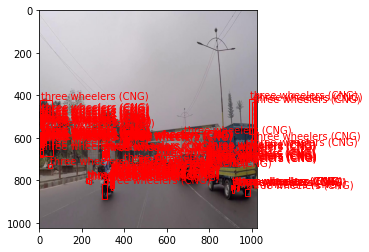

In [ ]:
image = utils.read_image('/content/sample_data/test1/test/Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg') 
predictions = model.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes, labels)

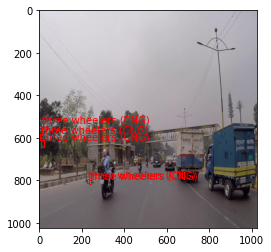

In [ ]:
thresh=0.4
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)